In [1]:
#One thing we could look at is the missions and supporting metrics given in the LU white paper annex.
#Published at: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1054766/Technical_annex_-_missions_and_metrics.pdf
#Will use the data we have on LUDA from the sub-nat explorer.
exec(open("data_prep/subnat_data_import.py").read()) 
from data_prep.subnat_data_clean import *

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#Get the metrics which are headline or supporting metrics for each mission.
#Use the 'top' headline as 1st entry, as this is what gets used for ranking clusters.
mission1 = [gva, weekly_pay, employ_rate, gdi]
#mission2 = [] #No metrics for this mission available
mission3 = [travel_car, travel_bike, travel_public]
mission4 = [broadband, mobile4g]
mission5 = [gcses, good_schools, lit_5, maths_5, comm_5]
mission6 = [app_start, app_completion] ##NOTE - these are NOT per 1000
mission7 = [male_hle, female_hle, smoking, adult_obesity, child_obesity]
mission8 = [satisfaction, anxiety, worthwhile, happiness]
#Note, missions 9 through 12 have no metrics on LUDA, apart from additions to housing stock

In [3]:
missions = [mission1, mission3, mission4, mission5, mission6, mission7, mission8]
for mission in missions:
    mission = clean_groups(mission)

In [4]:
#Do the clustering.
from cluster_analysis.cluster_functions import *
clustering_model = make_clustering_model()

In [5]:
#Convert missions to wide format
table1 = metrics_to_table(mission1)
table3 = metrics_to_table(mission3)
table4 = metrics_to_table(mission4)
table5 = metrics_to_table(mission5)
table6 = metrics_to_table(mission6)
table7 = metrics_to_table(mission7)
table8 = metrics_to_table(mission8)

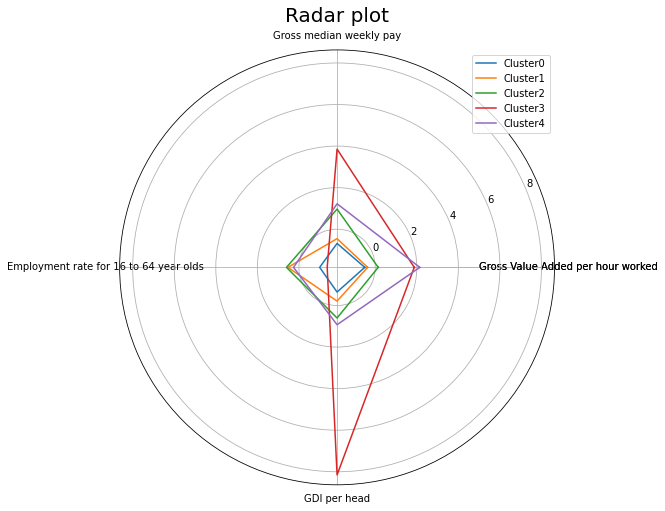

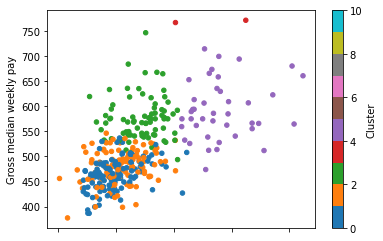

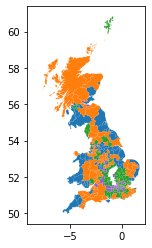

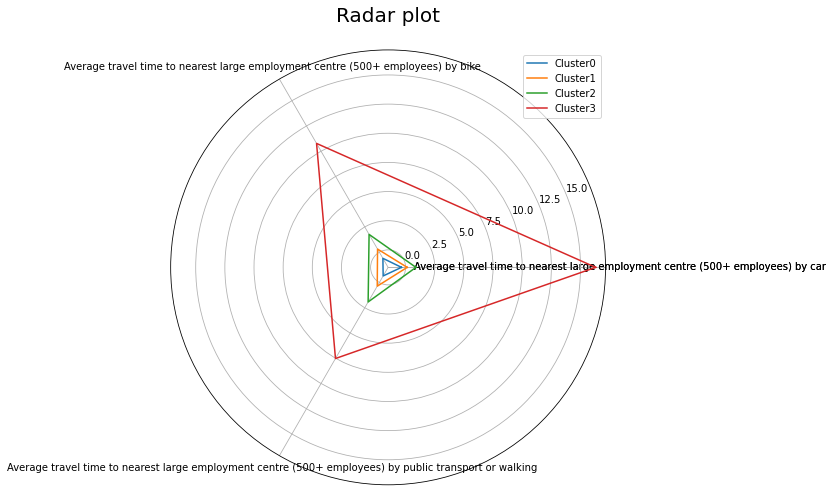

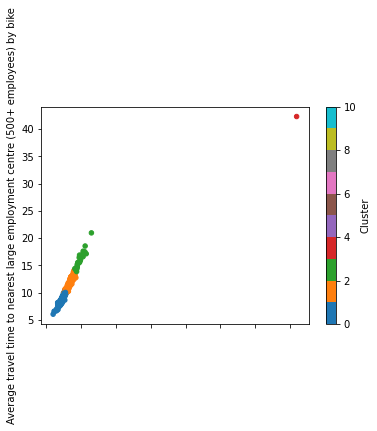

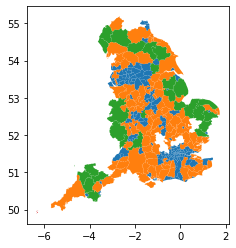

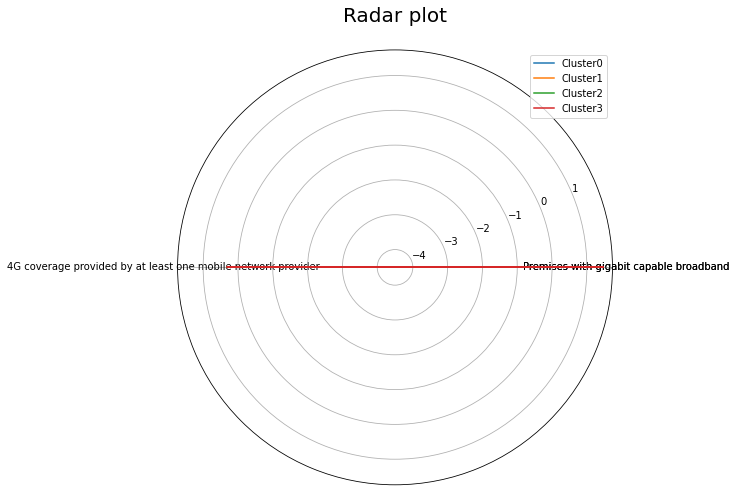

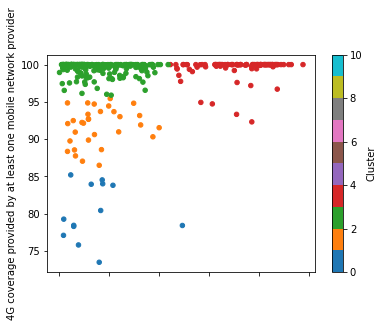

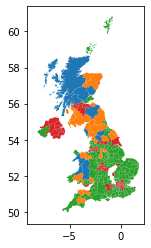

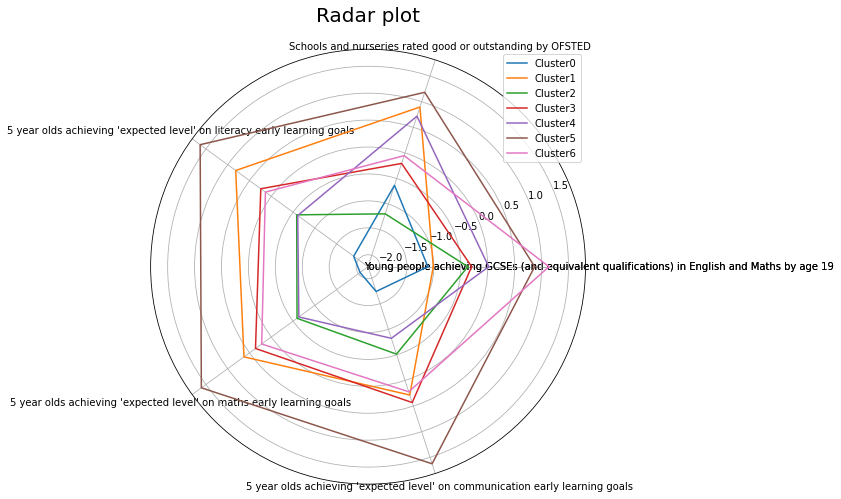

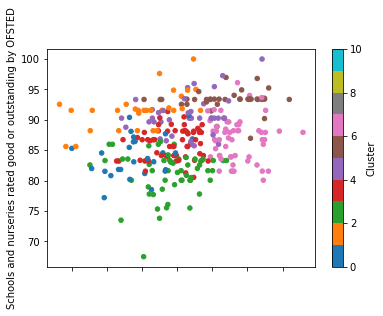

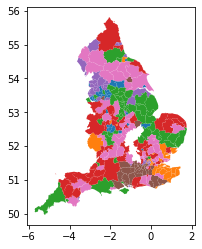

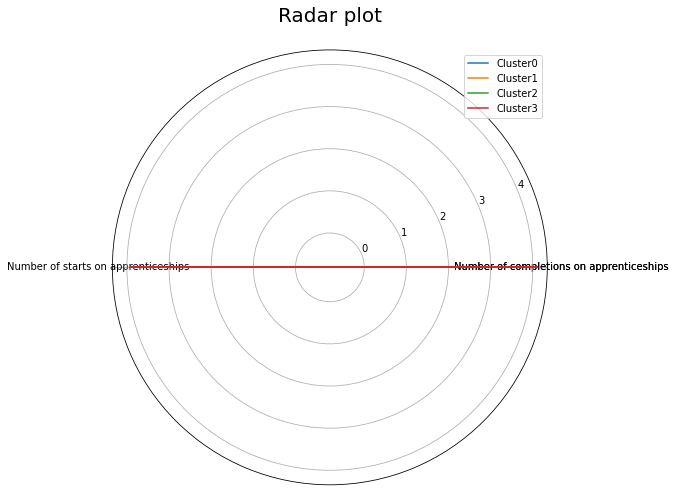

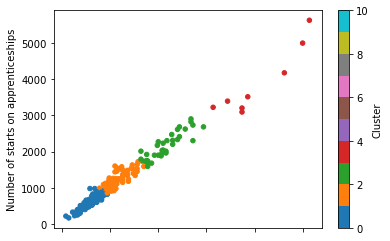

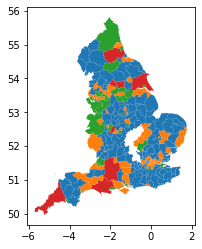

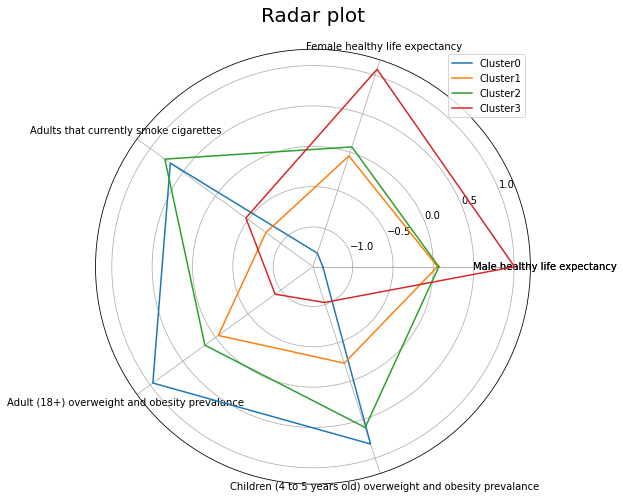

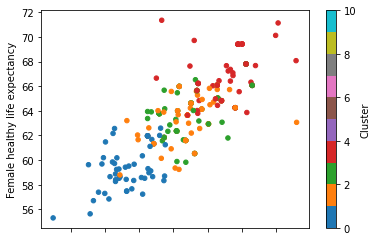

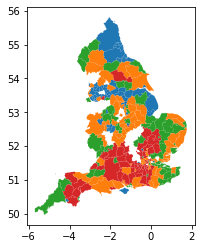

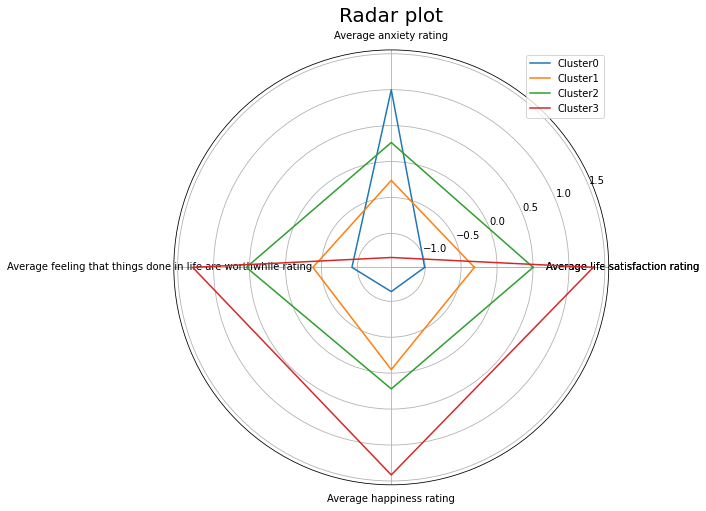

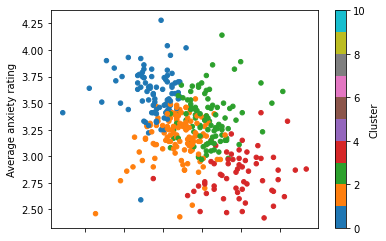

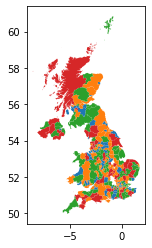

In [6]:
#Generate groups of clusters
clusters1 = clusters_and_plots(table1, clustering_model, show_plots=True)
clusters3 = clusters_and_plots(table3, clustering_model, show_plots=True)
clusters4 = clusters_and_plots(table4, clustering_model, show_plots=True)
clusters5 = clusters_and_plots(table5, clustering_model, show_plots=True)
clusters6 = clusters_and_plots(table6, clustering_model, show_plots=True)
clusters7 = clusters_and_plots(table7, clustering_model, show_plots=True)
clusters8 = clusters_and_plots(table8, clustering_model, show_plots=True)

In [7]:
#Prep for bubble plots
from data_vis.bubble_plots import *
all_clusters = [clusters1, clusters3, clusters4, clusters5, clusters6, clusters7, clusters8]

#Annoyingly this function only works when declared at main level (not in module due to globals())
def variable_to_name(var):
    """Helper function with takes in a variable and return a string of that variables name.
    If the variable doesn't exist, will return null.
    Might go wrong if there are multiple declared variables with identical values!
    """
    for name in globals():
        if (eval(name) is var) and (not name.startswith("_")): #Omit variables in globals with begin with _, as __ is shorthand for last evaluated result and in jupyter notebooks _1 return output of cell evaluation 1 etc.
            return(name)

labels = [variable_to_name(all_clusters[i]) for i in range(len(all_clusters))]
all_clusters = combine_clusters(all_clusters, labels)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Cluster_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Cluster_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


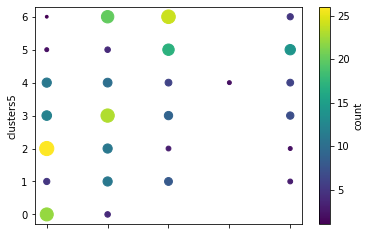

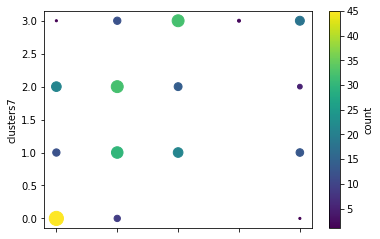

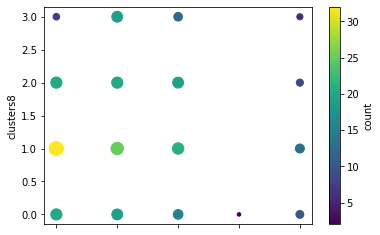

In [10]:
#Look into bubble plots.
#Missions 1,5,7,8 are most interesting. 5 has quite a lot of clusters, quite complex.
#Missions 3 and 4 OK?
plot_bubbles('clusters1', 'clusters5', all_clusters)
plot_bubbles('clusters1', 'clusters7', all_clusters)
plot_bubbles('clusters1', 'clusters8', all_clusters)

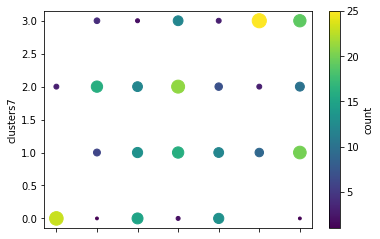

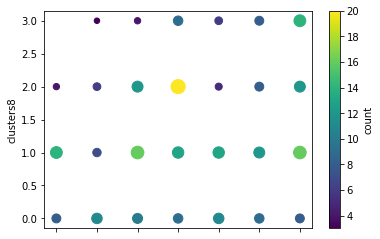

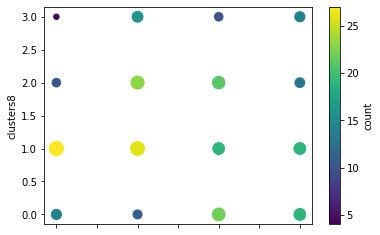

In [11]:
#Look at cross-over between missions 5,7,8
plot_bubbles('clusters5', 'clusters7', all_clusters)
plot_bubbles('clusters5', 'clusters8', all_clusters)
plot_bubbles('clusters7', 'clusters8', all_clusters)

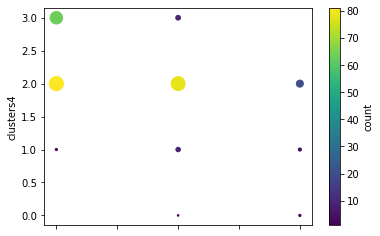

In [12]:
plot_bubbles('clusters3', 'clusters4', all_clusters)